## Import Packages

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import ROOT
import pylhe

Welcome to JupyROOT 6.20/04


## Define Mass Functions

In [2]:
def invariant_mass(p1, p2):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu)+getattr(p2,mu))**2 for mu in ['e','px','py','pz']))
def transverse_mass(p1):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu))**2 for mu in ['e','pz']))

#### Note:
 \begin{align}
 & p_\mu p^\mu = \frac{E^2}{c^2}-\vec{p}^2=m^2c^2 \\
 &\Rightarrow m^2=E^2-\vec{p}^2
 \end{align}
Transverse mass with $c=1$
 \begin{align}
 m_T^2 = m^2+p_x^2+p_y^2=E^2-p_z^2 \\
 \end{align}

## Create a Event List, Mass Lists and extract interesting informations

In [3]:
# process_path_MZ_1500 = '/youwei_home/SVJ_py/Tutorial/s_channel0/Events/run_01/unweighted_events.lhe'
process_path_MZ_1500 = '/youwei_home/SVJ_py/Tutorial/LHE/0.lhe'
s_channel0_MZ_1500 = pylhe.readLHE(process_path_MZ_1500)

event_list = []

for event in s_channel0_MZ_1500:
    event_list.append(event)

In [4]:
print(dir(event_list[0]))
print('-'*147)
print(dir(event_list[0].particles))
print('-'*147)
print(dir(event_list[0].particles.index))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'attributes', 'eventinfo', 'particles', 'weights']
---------------------------------------------------------------------------------------------------------------------------------------------------
['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshoo

#### Note: These are not interesting informations.

In [5]:
dir(event_list[0].particles[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

In [6]:
print('{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}'.format('#','id','mother1','mother2','e','px','py','pz','status'))

for n in range(6):
    for i, element in enumerate(event_list[n].particles):
        print('{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}'
          .format(i+1, element.id, element.mother1, element.mother2, element.e, element.px, element.py, element.pz, element.status))
    print('-'*102)

     #         id      mother1     mother2        e           px          py          pz        status   
     1          2         0           0        3847.643     0.000       0.000      3847.643       -1     
     2         -2         0           0        145.547      -0.000      -0.000     -145.547       -1     
     3       5000001      1           2        3993.190     0.000       0.000      3702.096       2      
     4       4900101      3           3        1518.592    672.809     -264.379    1335.460       1      
     5      -4900101      3           3        2474.598    -672.809    264.379     2366.636       1      
------------------------------------------------------------------------------------------------------
     1         -2         0           0        1088.959     -0.000      0.000      1088.959       -1     
     2          2         0           0        629.358      0.000       -0.000     -629.358       -1     
     3       5000001      1           2        15

#### Note: How many particls in each event?

In [7]:
event_list[0]

In [8]:
len(event_list)

10000

In [9]:
for n in range(6):
    print(len(event_list[n].particles))

5
7
7
6
7
5


#### Note:
Therefore, we can find each event number is not the same. \
And I have three way to extract interesting informations.

In [10]:
[i.status for i in event_list[0].particles]  # particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 1.0, 1.0]

In [11]:
test_status = []
for i in event_list[0].particles:
    test_status.append(i.status)
print(test_status)

for i in range(5):
    print(getattr(event_list[0].particles[i], 'status'))

[-1.0, -1.0, 2.0, 1.0, 1.0]
-1.0
-1.0
2.0
1.0
1.0


In [12]:
print([i.mother2 for i in event_list[1].particles])
print([i.e for i in event_list[1].particles])
print([i.pz for i in event_list[1].particles])

[0.0, 0.0, 2.0, 3.0, 3.0, 2.0, 2.0]
[1088.9593186, 629.35821199, 1597.2539351, 574.56886545, 1022.6850696, 66.93148139, 54.132114138]
[1088.9593186, -629.35821199, 541.40240586, -388.61692996, 930.01933582, -47.942925309, -33.858373939]


In [13]:
test_mother2, test_e, test_pz = [], [], []
for i in event_list[1].particles:
    test_mother2.append(i.mother2)
    test_e.append(i.e)
    test_pz.append(i.pz)
print(test_mother2)
print(test_e)
print(test_pz)
print('-'*102)

test_mother2, test_e, test_pz = [], [], []
for i in range(len(event_list[1].particles)):
    test_mother2.append(getattr(event_list[1].particles[i], 'mother2'))
    test_e.append(getattr(event_list[1].particles[i], 'e'))
    test_pz.append(getattr(event_list[1].particles[i], 'pz'))
print(test_mother2)
print(test_e)
print(test_pz)

[0.0, 0.0, 2.0, 3.0, 3.0, 2.0, 2.0]
[1088.9593186, 629.35821199, 1597.2539351, 574.56886545, 1022.6850696, 66.93148139, 54.132114138]
[1088.9593186, -629.35821199, 541.40240586, -388.61692996, 930.01933582, -47.942925309, -33.858373939]
------------------------------------------------------------------------------------------------------
[0.0, 0.0, 2.0, 3.0, 3.0, 2.0, 2.0]
[1088.9593186, 629.35821199, 1597.2539351, 574.56886545, 1022.6850696, 66.93148139, 54.132114138]
[1088.9593186, -629.35821199, 541.40240586, -388.61692996, 930.01933582, -47.942925309, -33.858373939]


In [14]:
[i.event for i in event_list[0].particles]

In [15]:
for n in range(6):
    for i, particle in enumerate(event_list[n].particles):
        if particle.id == 4900101:
            p1 = event_list[n].particles[i]
            print(i+1, getattr(p1,'e'))
        elif particle.id == -4900101:
            p2 = event_list[n].particles[i]
            print(i+1, getattr(p2,'e'))
    print('-'*14)

4 1518.5916918
5 2474.5978908
--------------
4 574.56886545
5 1022.6850696
--------------
4 511.6652133
5 1132.350957
--------------
4 1973.1963654
5 854.62152145
--------------
4 762.64210098
5 887.2425824
--------------
4 769.20609332
5 736.13535744
--------------


## Chek all events only have a 4900101 and -4900101

In [16]:
nevents = len(event_list)
acc_p49 = 0
acc_m49 = 0
for n in range(nevents):
    for i, particle in enumerate(event_list[n].particles):
        if particle.id == 4900101:
            acc_p49 += 1
        elif particle.id == -4900101:
            acc_m49 += 1
            
print(acc_p49, acc_m49)

10000 10000


#### Note: This is not good!!

## Create Mass List and Plot

In [17]:
m, mT = [], []
nevents = len(event_list)
for n in range(nevents):
    for i, particle in enumerate(event_list[n].particles):
        if particle.id == 4900101:
            p1 = event_list[n].particles[i]
        elif particle.id == -4900101:
            p2 = event_list[n].particles[i]
            
    m.append(invariant_mass(p1,p2))
    
m = np.array(m)

In [ ]:
plt.figure(figsize=(8,8))  # plot size
 
bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m, bins=bin_size)
plt.hist(m, bin)


plt.step(bin_size, m.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('Events/Bin', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# Not take log for scale of y axis.
plt.figure(figsize=(8,8))
plt.hist(m, bins=bin_size)
plt.title('Invariant Mass of $Z^\prime$')
plt.show()

In [29]:
np.linspace(800,2000,121)

array([ 800.,  810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,
        890.,  900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,
        980.,  990., 1000., 1010., 1020., 1030., 1040., 1050., 1060.,
       1070., 1080., 1090., 1100., 1110., 1120., 1130., 1140., 1150.,
       1160., 1170., 1180., 1190., 1200., 1210., 1220., 1230., 1240.,
       1250., 1260., 1270., 1280., 1290., 1300., 1310., 1320., 1330.,
       1340., 1350., 1360., 1370., 1380., 1390., 1400., 1410., 1420.,
       1430., 1440., 1450., 1460., 1470., 1480., 1490., 1500., 1510.,
       1520., 1530., 1540., 1550., 1560., 1570., 1580., 1590., 1600.,
       1610., 1620., 1630., 1640., 1650., 1660., 1670., 1680., 1690.,
       1700., 1710., 1720., 1730., 1740., 1750., 1760., 1770., 1780.,
       1790., 1800., 1810., 1820., 1830., 1840., 1850., 1860., 1870.,
       1880., 1890., 1900., 1910., 1920., 1930., 1940., 1950., 1960.,
       1970., 1980., 1990., 2000.])

ValueError: x and y must have same first dimension, but have shapes (121,) and (10000,)

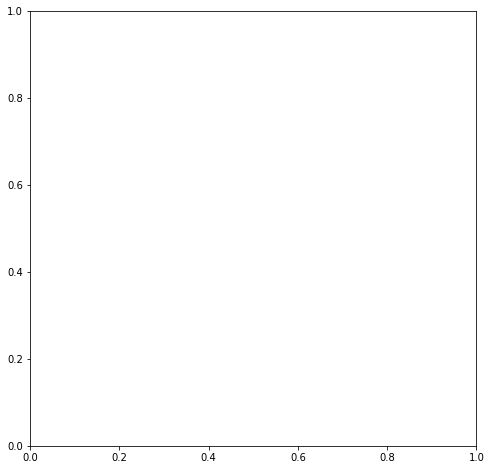

In [27]:
plt.figure(figsize=(8,8))  # plot size
 
bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m, bins=bin_size)
plt.step(bin_size, m.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('Events/Bin', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# Not take log for scale of y axis.
plt.figure(figsize=(8,8))
plt.hist(m, bins=bin_size)
plt.title('Invariant Mass of $Z^\prime$')
plt.show()

In [20]:
m

array([1496.67914014, 1500.5189328 , 1517.53900635, ..., 1531.78908139,
       1479.75860541, 1500.80781428])

In [25]:
bin_size

array([ 800.,  810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,
        890.,  900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,
        980.,  990., 1000., 1010., 1020., 1030., 1040., 1050., 1060.,
       1070., 1080., 1090., 1100., 1110., 1120., 1130., 1140., 1150.,
       1160., 1170., 1180., 1190., 1200., 1210., 1220., 1230., 1240.,
       1250., 1260., 1270., 1280., 1290., 1300., 1310., 1320., 1330.,
       1340., 1350., 1360., 1370., 1380., 1390., 1400., 1410., 1420.,
       1430., 1440., 1450., 1460., 1470., 1480., 1490., 1500., 1510.,
       1520., 1530., 1540., 1550., 1560., 1570., 1580., 1590., 1600.,
       1610., 1620., 1630., 1640., 1650., 1660., 1670., 1680., 1690.,
       1700., 1710., 1720., 1730., 1740., 1750., 1760., 1770., 1780.,
       1790., 1800., 1810., 1820., 1830., 1840., 1850., 1860., 1870.,
       1880., 1890., 1900., 1910., 1920., 1930., 1940., 1950., 1960.,
       1970., 1980., 1990., 2000.])

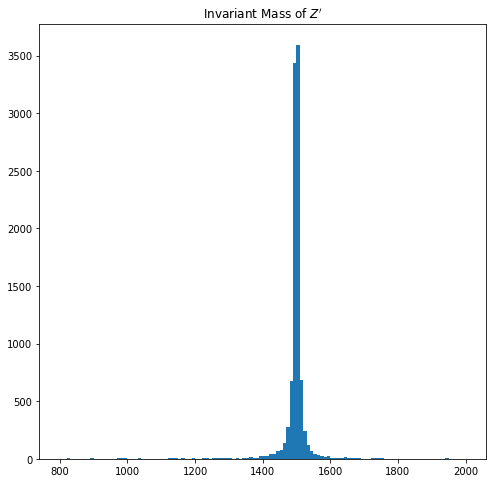

In [28]:
plt.figure(figsize=(8,8))
plt.hist(m, bins=bin_size)
plt.title('Invariant Mass of $Z^\prime$')
plt.show()

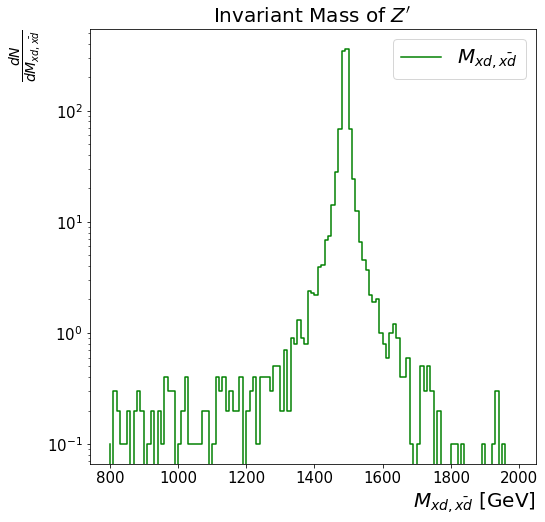

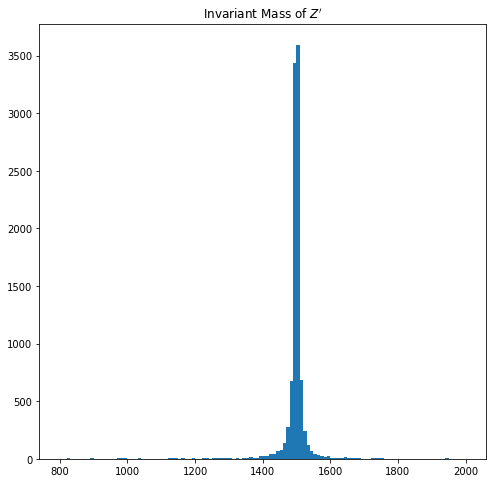

In [19]:
plt.figure(figsize=(8,8))  # plot size
 
bin_size = np.linspace(800,2000,121)
hist, bins = np.histogram(m, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10, color='green', label='$M_{xd,\\bar{xd}}$')

plt.legend(fontsize=20)
plt.yscale('log')
plt.title('Invariant Mass of $Z^\prime$', fontsize=20)
plt.xlabel('$M_{xd,\\bar{xd}}$ [GeV]', fontsize=20, horizontalalignment='right', x=1)
plt.ylabel('$\\frac{dN}{dM_{xd,\\bar{xd}}}$', fontsize=20, horizontalalignment='right', y=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



# Not take log for scale of y axis.
plt.figure(figsize=(8,8))
plt.hist(m, bins=bin_size)
plt.title('Invariant Mass of $Z^\prime$')
plt.show()

#### Calculate average invariant mass.

In [18]:
sum(m)/nevents

1492.3187279730857

#### Check total event number.

In [19]:
print(sum(hist))
bin_size = np.linspace(100,3600,351)
hist, bins = np.histogram(m, bins=bin_size)
print(sum(hist))

9947
10000


## pylhe-Failure

#### Note:
I want to try different way to produce the same result.
In terminal, we must command 'pip3 install rootnotes'.

In [1]:
import pylhe
import rootnotes
import ROOT
import math

Welcome to JupyROOT 6.20/04


In [2]:
h = ROOT.TH1F('invmass','Invariant Mass of Final State',150,25,175)
h.SetFillColor(38)

In [3]:
def invariant_mass(p1, p2):
    return math.sqrt(sum((1 if mu=='e' else -1)*(getattr(p1,mu)+getattr(p2,mu))**2 for mu in ['e','px','py','pz']))

In [4]:
event_list2 = []
for e in pylhe.readLHE('/youwei_home/SVJ_py/Tutorial/LHE/0.lhe'):
    event_list2.append(e)

In [6]:
nevents2 = len(event_list2)
for n in range(nevents2):
    for i, particle in enumerate(event_list2[n].particles):
        if particle.id == 4900101:
            p1 = event_list2[n].particles[i]
        elif particle.id == -4900101:
            p2 = event_list2[n].particles[i]
            
    h.Fill(invariant_mass(p1,p2),event_list2[n].eventinfo.weight)  

In [7]:
c = rootnotes.default_canvas()
c.SetLogy()

AttributeError: module 'rootnotes' has no attribute 'default_canvas'

In [10]:
h.Draw('bar')
# c